In [23]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

drug = pd.read_csv("data/mouse_drug_data.csv")
print(drug.shape)
drug.head()

(250, 2)


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [25]:
clinical = pd.read_csv("data/clinicaltrial_data.csv")

print(clinical.shape)
clinical.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [27]:
# Combine the data into a single dataset

df = pd.merge(drug,clinical, on = "Mouse ID")


# Display the data table for preview

print(df.shape)
df.head()



(1906, 5)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [36]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 


# Convert to DataFrame
response = df[["Drug", "Timepoint", "Tumor Volume (mm3)"]].groupby(["Drug","Timepoint"]).agg("mean").reset_index()
# Preview DataFrame
response.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [45]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint


# Convert to DataFrame
response_sem = df[["Drug", "Timepoint", "Tumor Volume (mm3)"]].groupby(["Drug","Timepoint"]).agg("sem").reset_index()
# Preview DataFrame
response_sem.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [52]:
# Minor Data Munging to Re-Format the Data Frames

pivot_table = response.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_table.reset_index(level = None, inplace = True)

# Preview that Reformatting worked
pivot_table.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


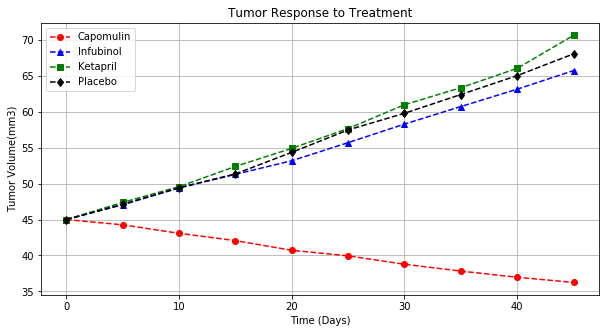

In [72]:
# Generate the Plot (with Error Bars)

plt.figure(figsize = (10, 5))


# Save the Figure

#fig=table_fourdrugs.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o',yerr = Capomulin_error);

plt.errorbar(x=pivot_table['Timepoint'],y=pivot_table['Capomulin'], linestyle="--", fmt='o', color = "red", label = "Capomulin")
plt.errorbar(x=pivot_table['Timepoint'],y=pivot_table['Infubinol'], linestyle="--", fmt='^', color = "blue",label = "Infubinol" )
plt.errorbar(x=pivot_table['Timepoint'],y=pivot_table['Ketapril'], linestyle="--",fmt='s', color = "green", label = "Ketapril")
plt.errorbar(x=pivot_table['Timepoint'],y=pivot_table['Placebo'], linestyle="--", fmt='d', color = "black", label = "Placebo")

plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
plt.grid()
plt.legend(loc = "top left")        
plt.show()



## Metastatic Response to Treatment

In [75]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

combine_group_mean_met= df.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame

met_response_mean_df = pd.DataFrame(combine_group_mean_met["Metastatic Sites"])

# Preview DataFrame

met_response_mean_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [78]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

combine_group_met_sem = df[["Drug", "Timepoint", "Metastatic Sites"]].groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame

met_response_sem_df = pd.DataFrame(combine_group_met_sem)


# Preview DataFrame

met_response_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [81]:
# Minor Data Munging to Re-Format the Data Frames

pivot_table = met_response_mean_df.reset_index().pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
pivot_table.reset_index(level = None, inplace = True)

# Preview that Reformatting worked
pivot_table.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


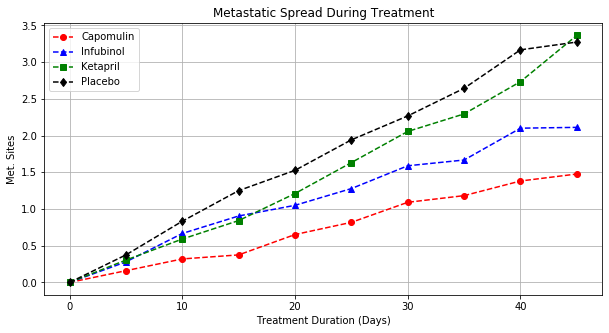

In [90]:
# Generate the Plot (with Error Bars)


plt.figure(figsize = (10, 5))

# Save the Figure

#fig=table_fourdrugs.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o',yerr = Capomulin_error);

plt.errorbar(x=pivot_table['Timepoint'],y=pivot_table['Capomulin'], linestyle="--", fmt='o', color = "red", label = "Capomulin")
plt.errorbar(x=pivot_table['Timepoint'],y=pivot_table['Infubinol'], linestyle="--", fmt='^', color = "blue",label = "Infubinol")
plt.errorbar(x=pivot_table['Timepoint'],y=pivot_table['Ketapril'], linestyle="--",fmt='s', color = "green", label = "Ketapril")
plt.errorbar(x=pivot_table['Timepoint'],y=pivot_table['Placebo'], linestyle="--", fmt='d', color = "black", label = "Placebo")

plt.ylabel('Met. Sites')
plt.xlabel('Treatment Duration (Days)')
plt.title('Metastatic Spread During Treatment')
plt.grid()
plt.legend(loc = "top left")        
plt.show()

# Show the Figure


## Survival Rates

In [96]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

micecount=df[["Drug","Timepoint", "Mouse ID"]].groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
micecount_df=pd.DataFrame(micecount["Mouse ID"])
micecount_df.reset_index(inplace=True)

# Preview DataFrame
micecount_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [97]:
# Minor Data Munging to Re-Format the Data Frames

pivot_table_mice = micecount_df.pivot(index ="Timepoint", columns = 'Drug', values = "Mouse ID")
pivot_table_mice.reset_index(level = None, inplace = True)

# Preview the Data Frame

pivot_table_mice.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [105]:
# Generate the Plot (Accounting for percentages)



![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [106]:
# Calculate the percent changes for Capomulin drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)